MAD Graphs for Patient 9

In [28]:
# Import Modules
import sys
sys.path.insert(0, r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\Modules')
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import Actigraph_Metrics

In [29]:
# Load 5 Min 1-Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')

filename = 'Patient9_5MIN_SW_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
29999


In [39]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

print(signal)

[0.002696924248455299, 0.002528581612412193, 0.002337860969362775, 0.0026102136243853513, 0.0026104712274745466, 0.0025727141699471833, 0.002493445101983012, 0.0023397036941697744, 0.0026613956212555843, 0.0023184538447918544, 0.00243668869033006, 0.0029177793961715293, 0.002715635726703125, 0.002567215564153389, 0.0024421550800777904, 0.0024911039932077462, 0.002385430848934238, 0.002539476212309348, 0.0027008791669808118, 0.002673873693162512, 0.0030721144531812338, 0.0024799446162645867, 0.0026711003342206907, 0.002442035047593909, 0.002964707037488519, 0.002517729131886173, 0.00270715288825127, 0.0021180850987258526, 0.002770735810930538, 0.002507891250872143, 0.002860064238094, 0.0029450272747128235, 0.002327254469198907, 0.0025991061869502594, 0.002222182595468989, 0.0023323911574915203, 0.0027446937526784043, 0.0025459178264308057, 0.0028057835172348323, 0.002214360071614545, 0.002230439946244558, 0.0023934560160653075, 0.0025575202971178834, 0.002728663714960491, 0.002548759072

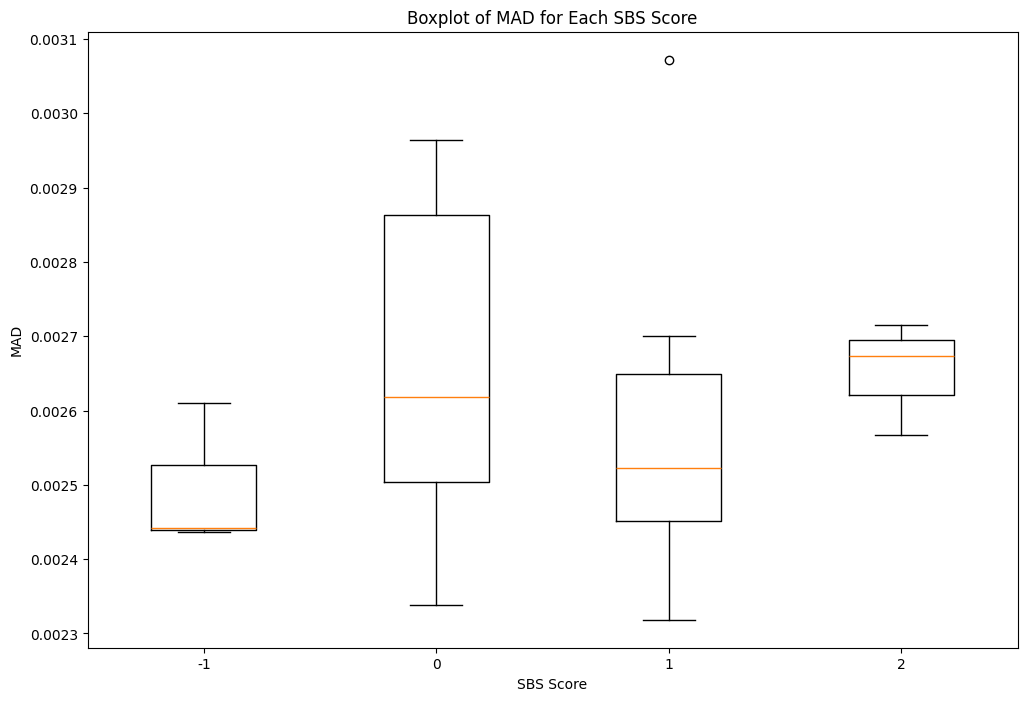

SBS Score: -1
Q1: 0.002439421885203925
Q2 (Median): 0.0024421550800777904
Q3: 0.0025263131537761685
90th Percentile: 0.0025768079979951956

SBS Score: 0
Q1: 0.0025031970479831465
Q2 (Median): 0.0026182002303823237
Q3: 0.0028625656092424717
90th Percentile: 0.002941243216830024

SBS Score: 1
Q1: 0.002451512439761578
Q2 (Median): 0.002523155372149183
Q3: 0.002648600122038026
90th Percentile: 0.0026919455171527753

SBS Score: 2
Q1: 0.00262054462865795
Q2 (Median): 0.002673873693162512
Q3: 0.0026947547099328184
90th Percentile: 0.0027072833199950023



In [45]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

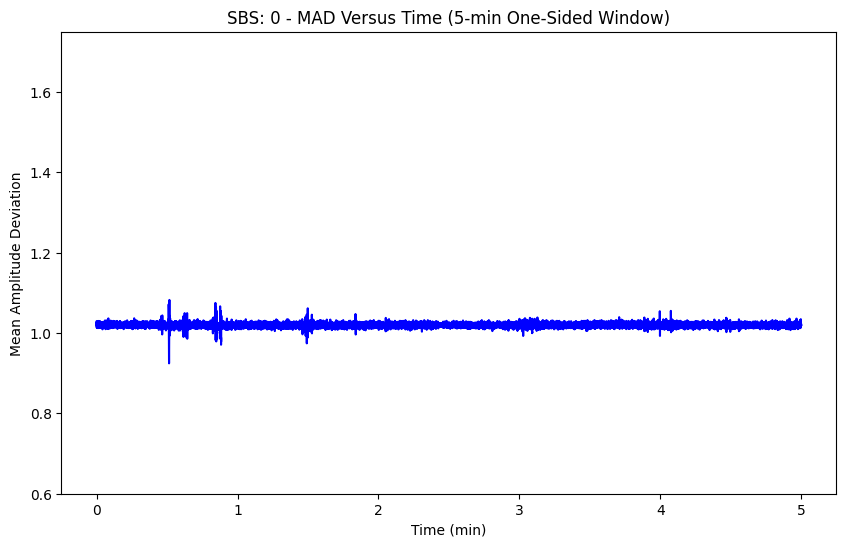

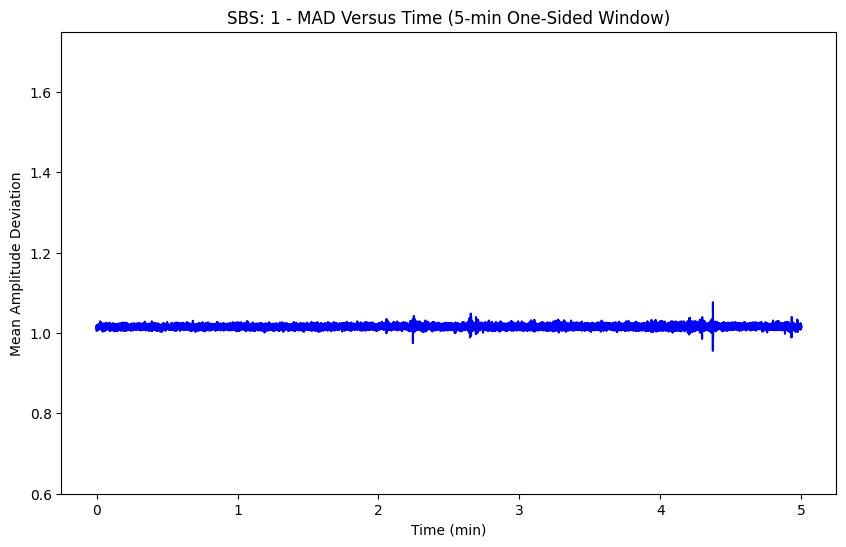

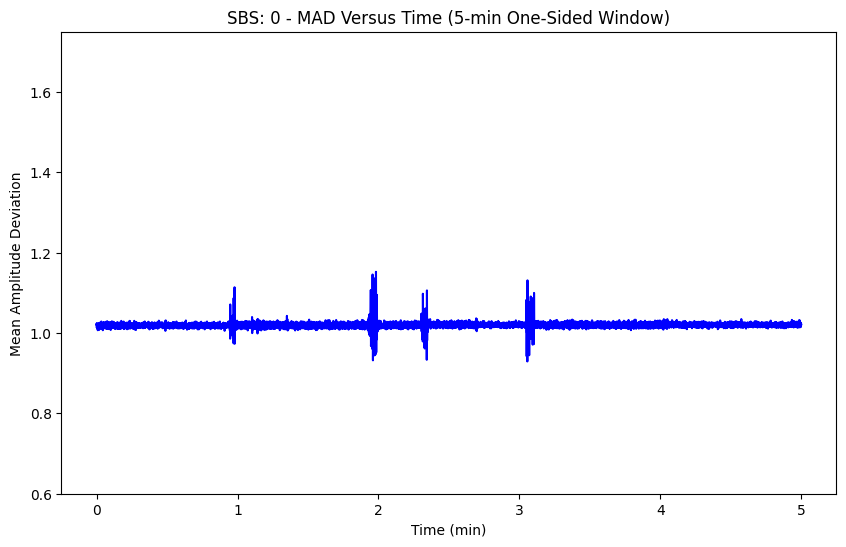

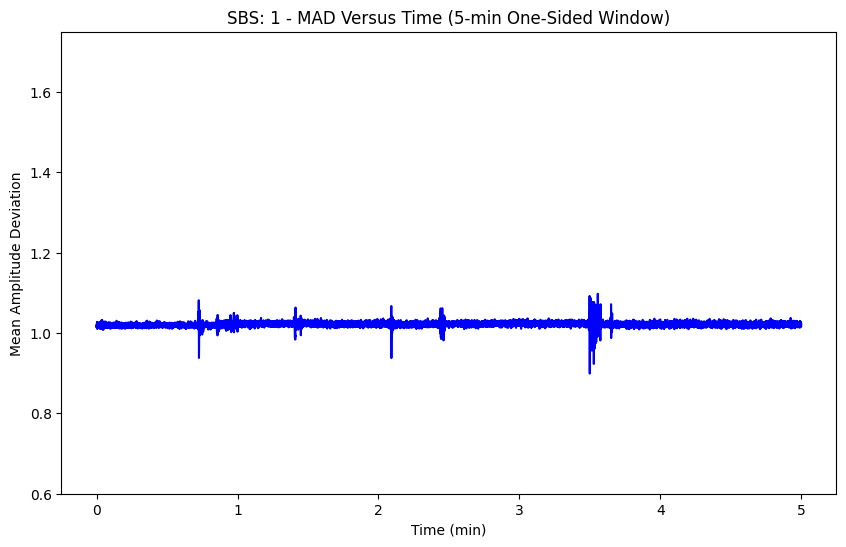

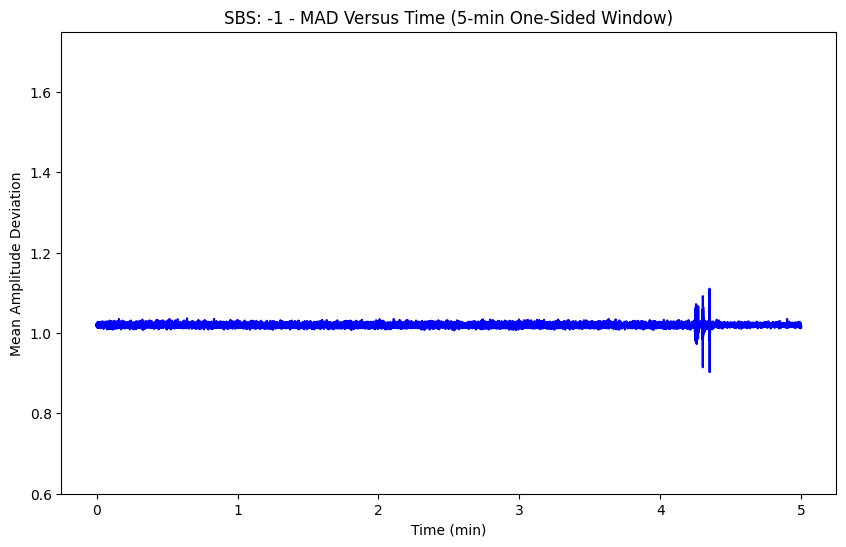

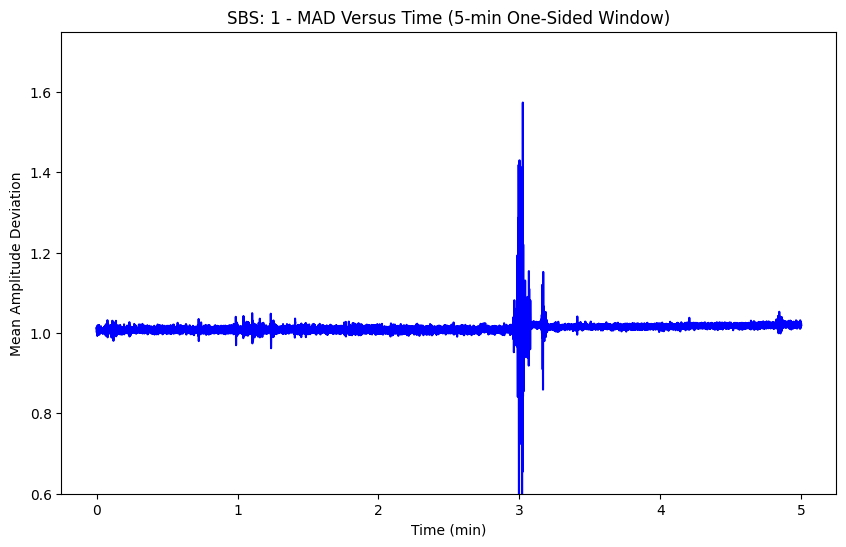

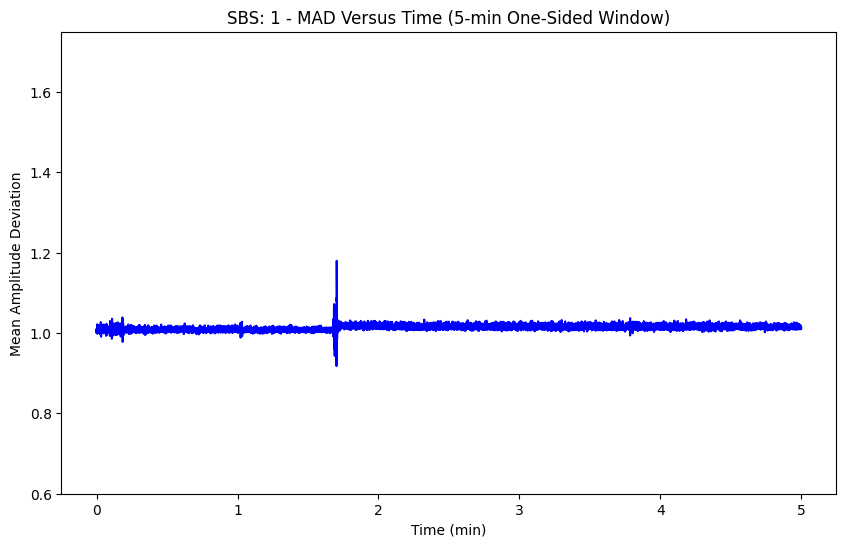

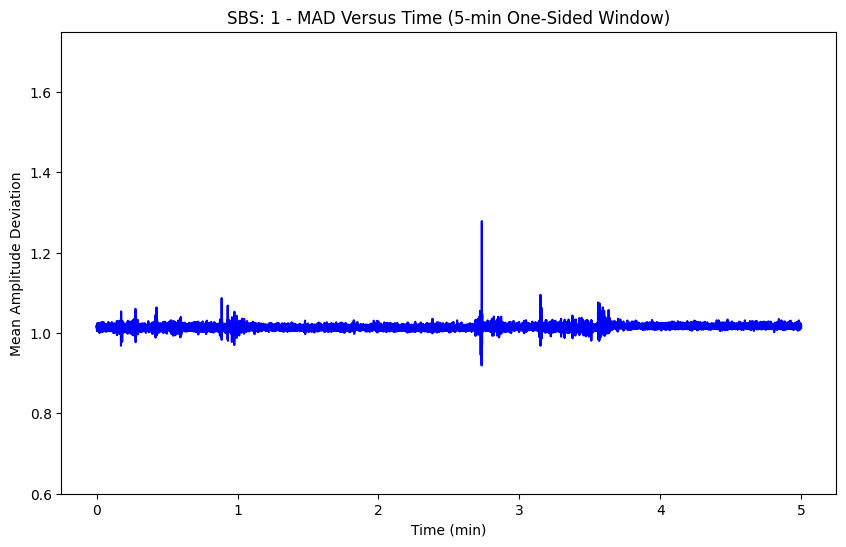

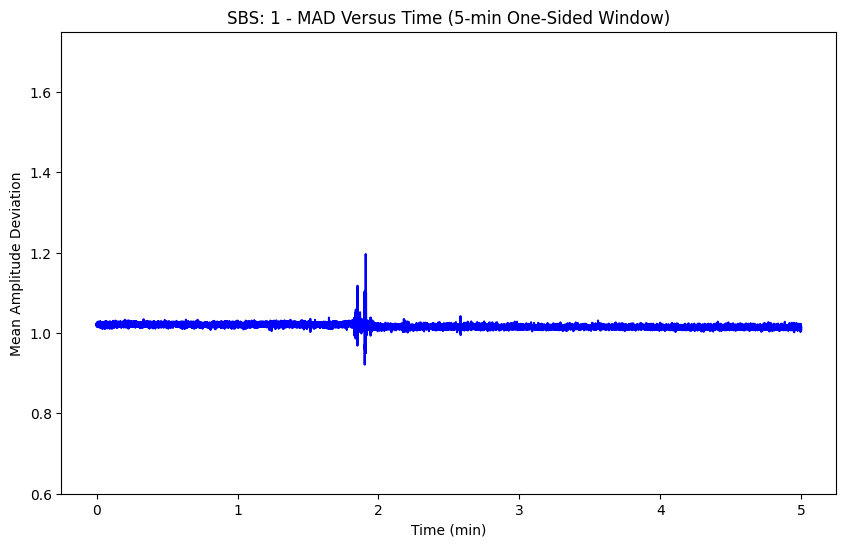

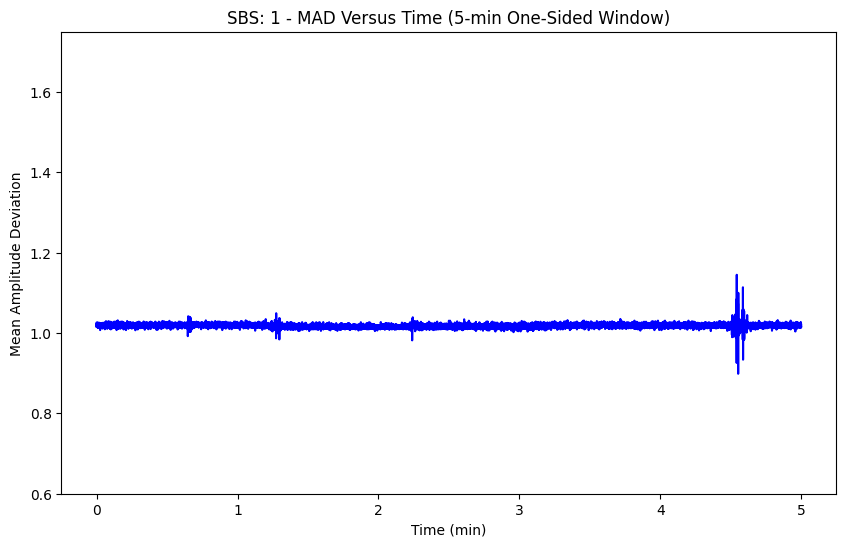

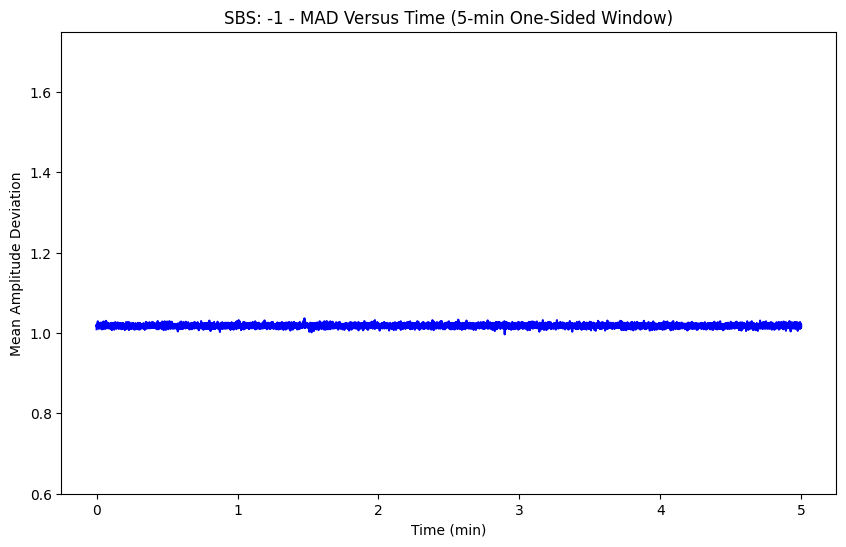

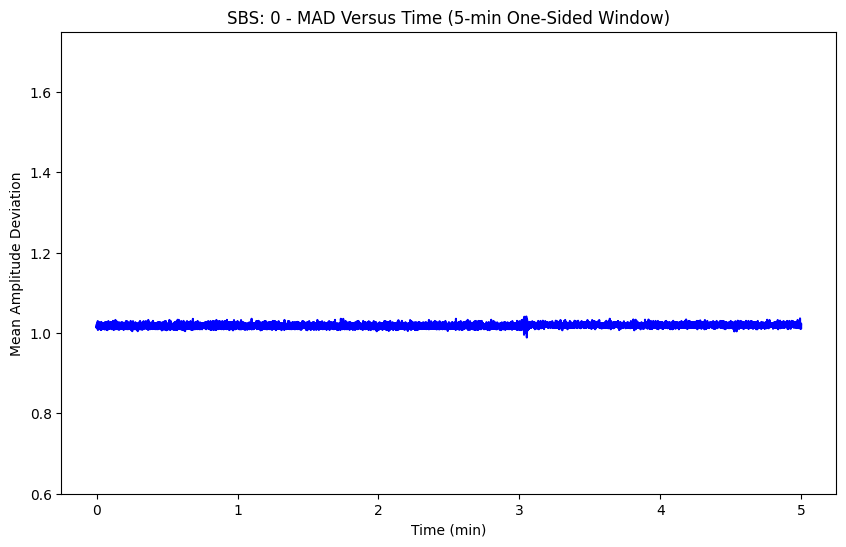

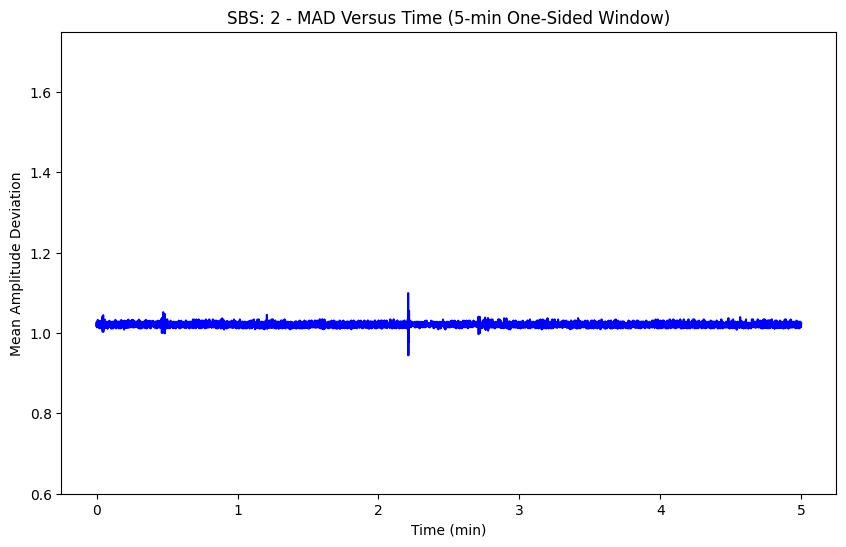

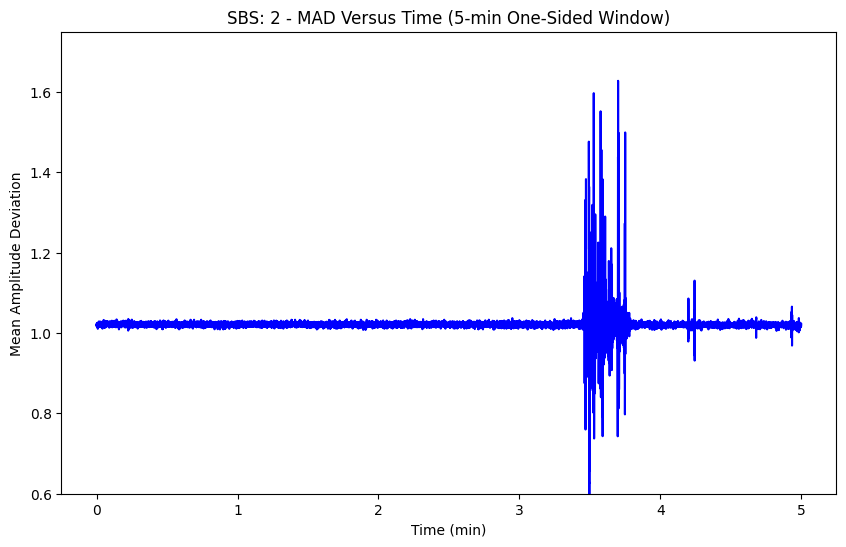

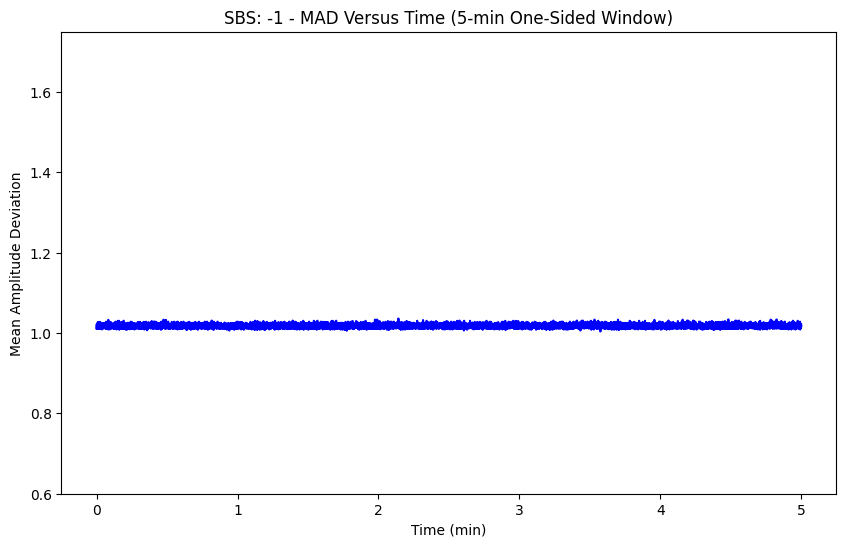

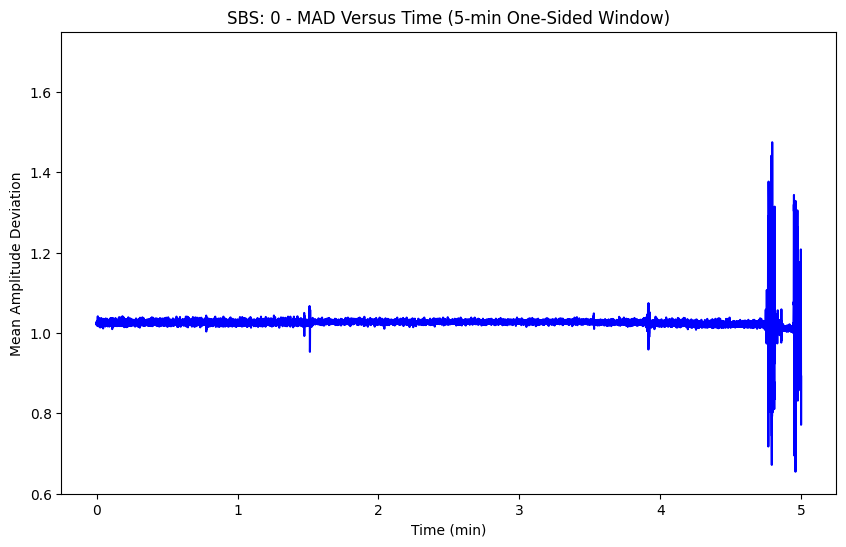

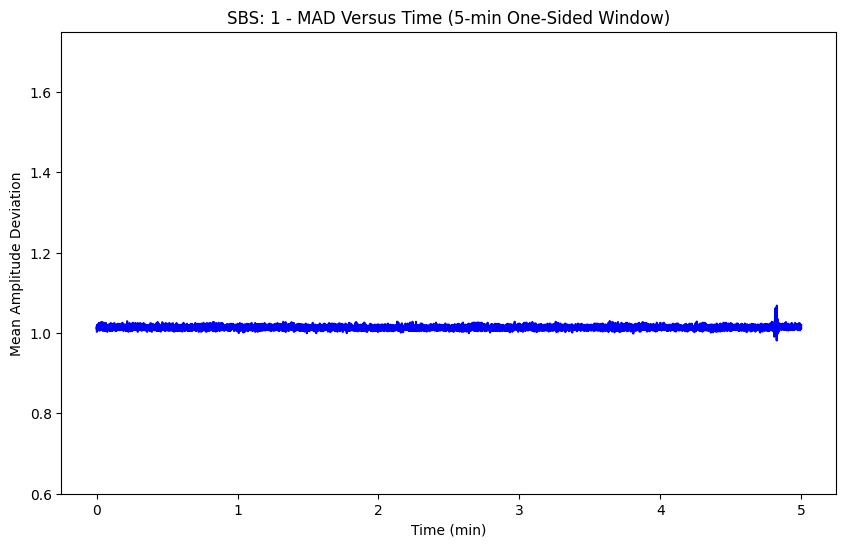

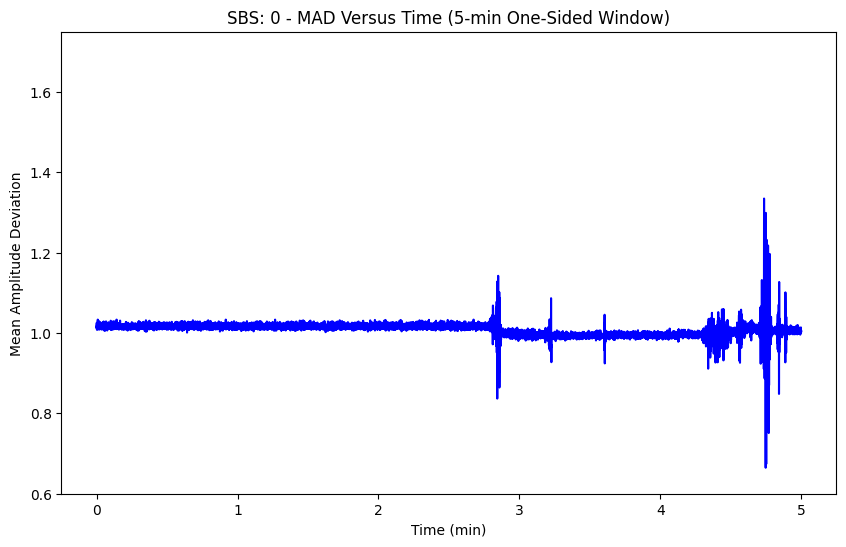

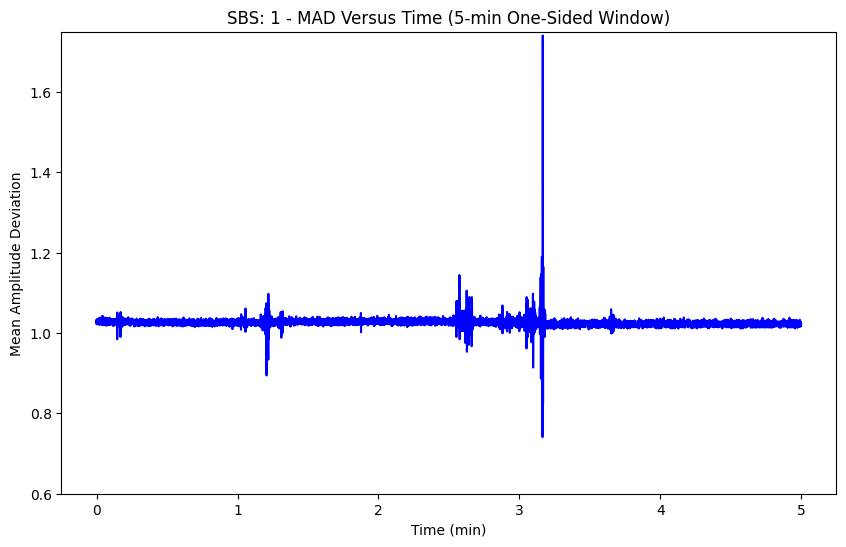

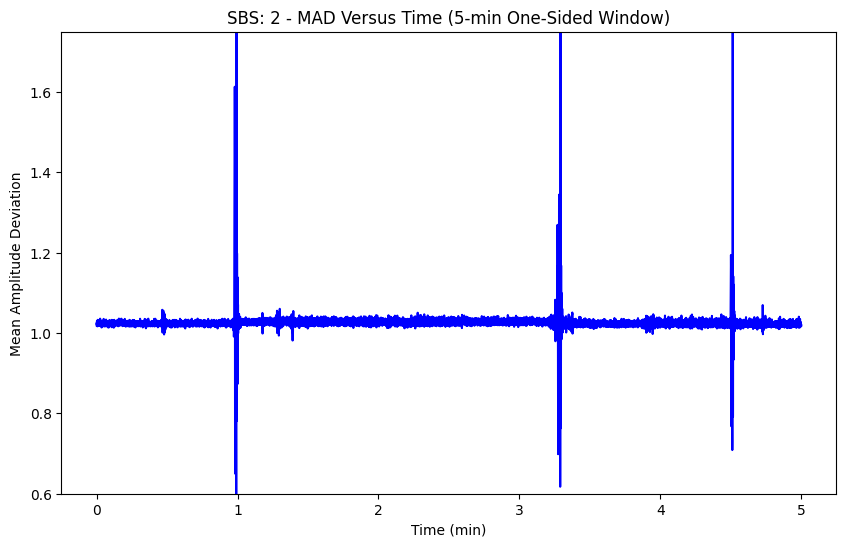

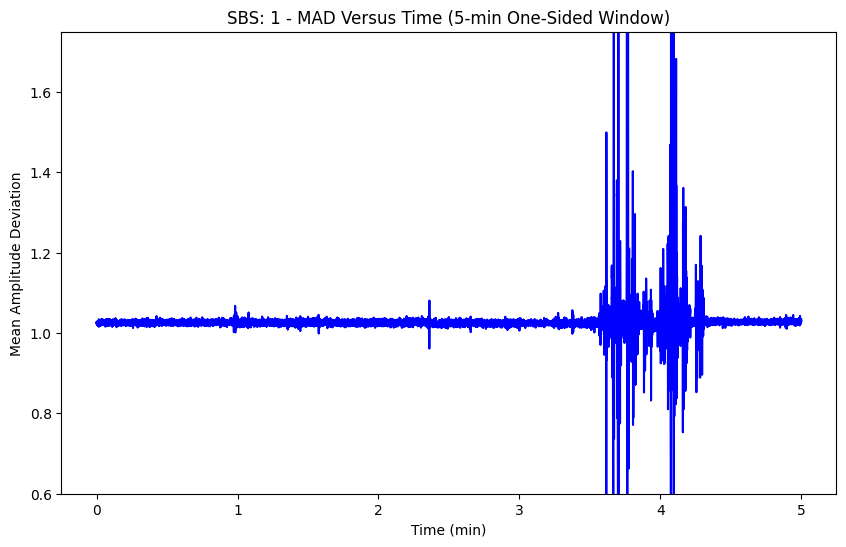

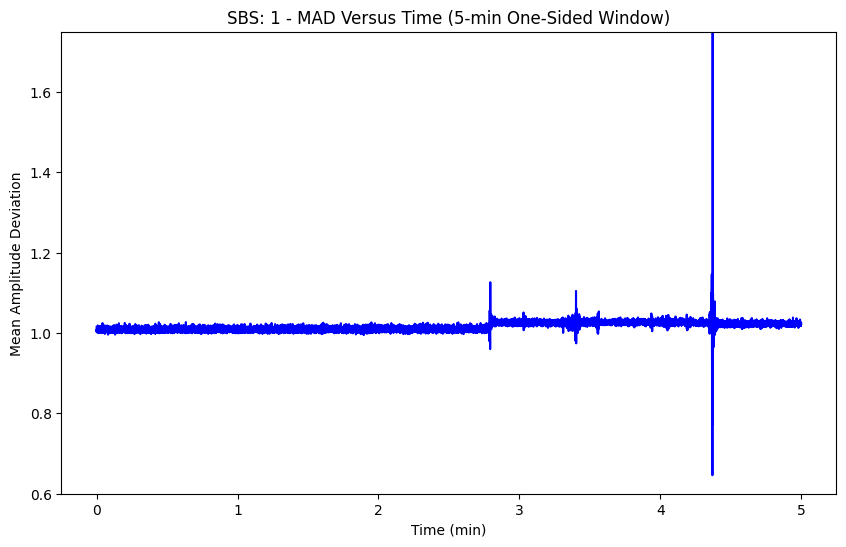

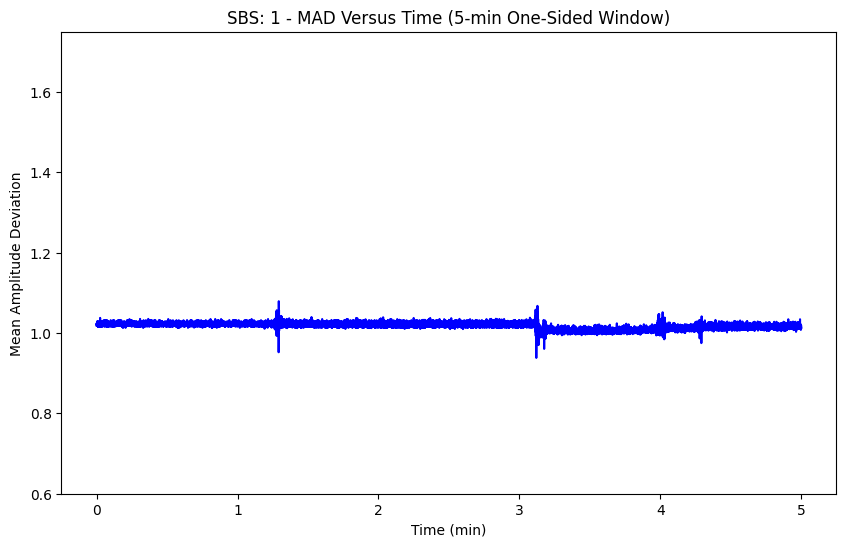

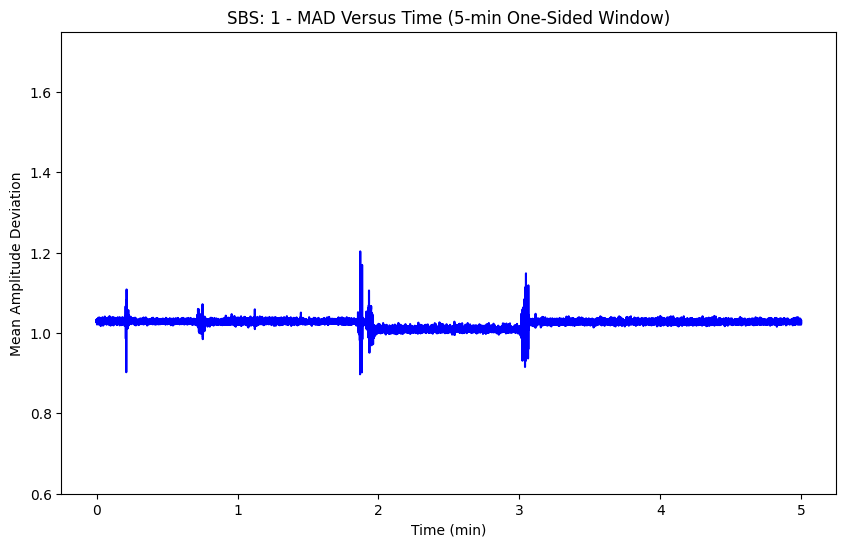

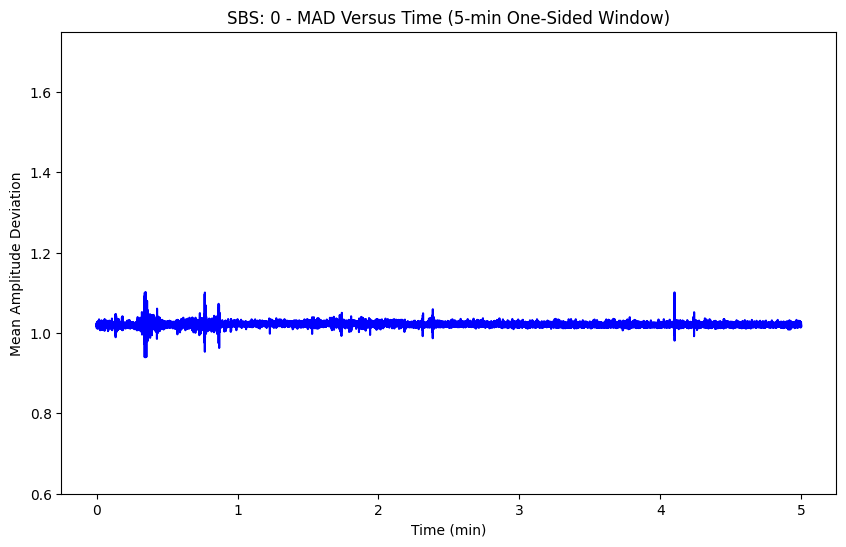

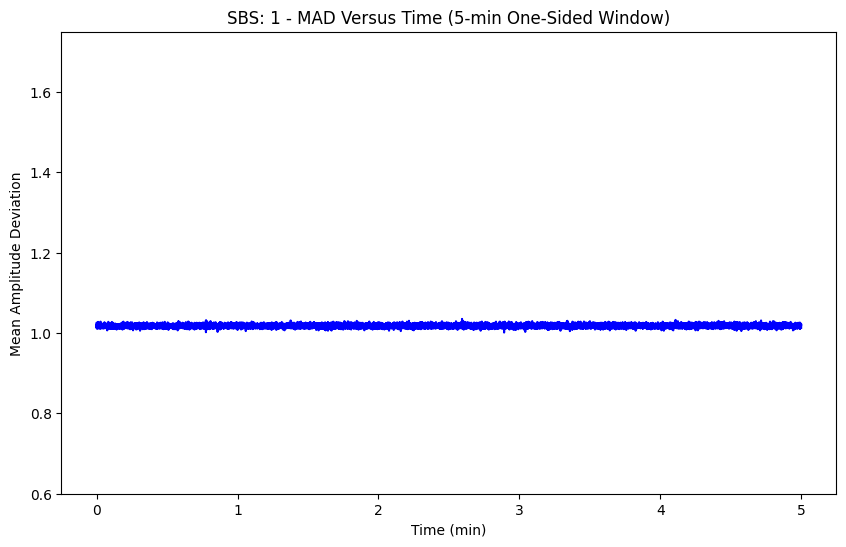

In [31]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 29999, num=29999)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 29999, num=6), ['0', '1', '2', '3', '4', '5'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (5-min One-Sided Window)')

    # Display the plot
    plt.show()
    
    count += 1

In [32]:
# Load 10-Min 1 Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')
filename = 'Patient9_10MIN_SW_Time_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
59899


In [33]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

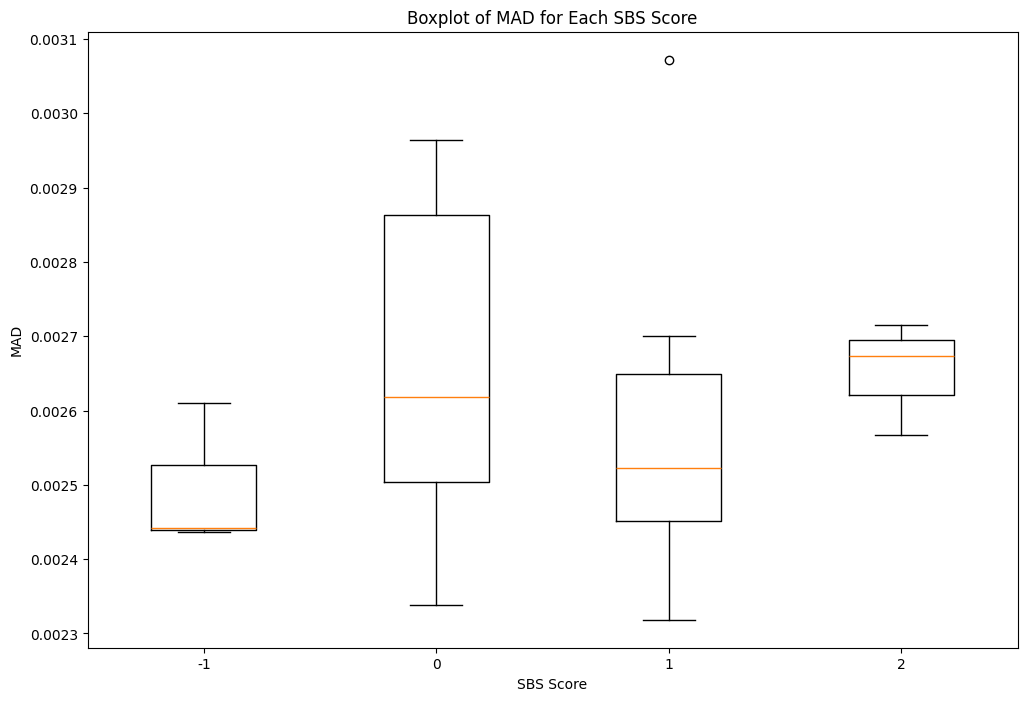

SBS Score: -1
Q1: 0.002439421885203925
Q2 (Median): 0.0024421550800777904
Q3: 0.0025263131537761685
90th Percentile: 0.0025768079979951956

SBS Score: 0
Q1: 0.0025031970479831465
Q2 (Median): 0.0026182002303823237
Q3: 0.0028625656092424717
90th Percentile: 0.002941243216830024

SBS Score: 1
Q1: 0.002451512439761578
Q2 (Median): 0.002523155372149183
Q3: 0.002648600122038026
90th Percentile: 0.0026919455171527753

SBS Score: 2
Q1: 0.00262054462865795
Q2 (Median): 0.002673873693162512
Q3: 0.0026947547099328184
90th Percentile: 0.0027072833199950023



In [46]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

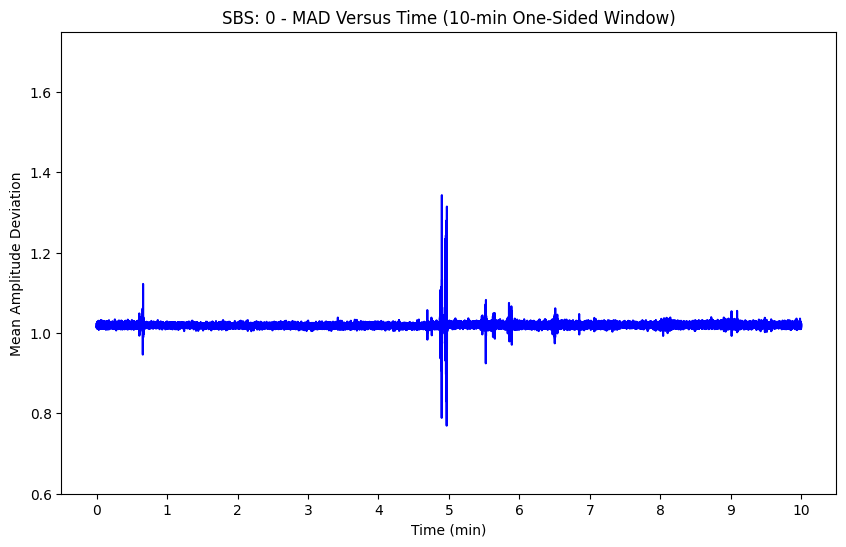

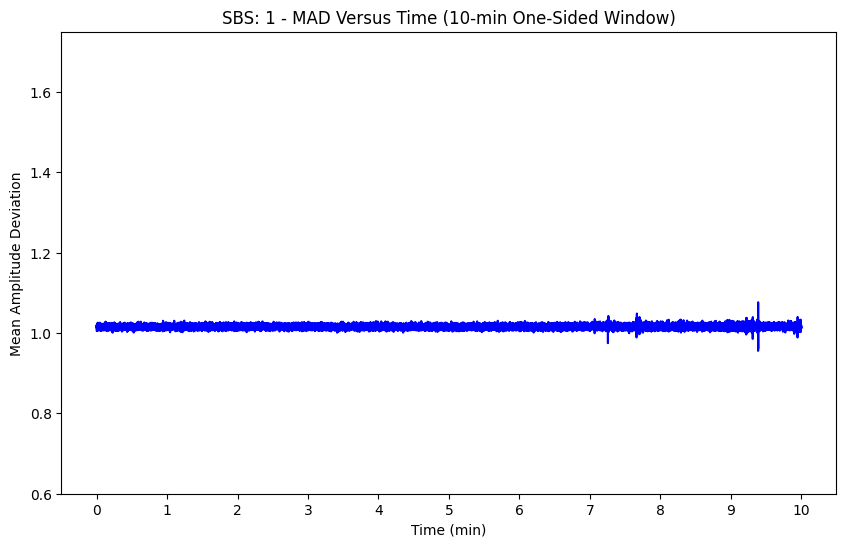

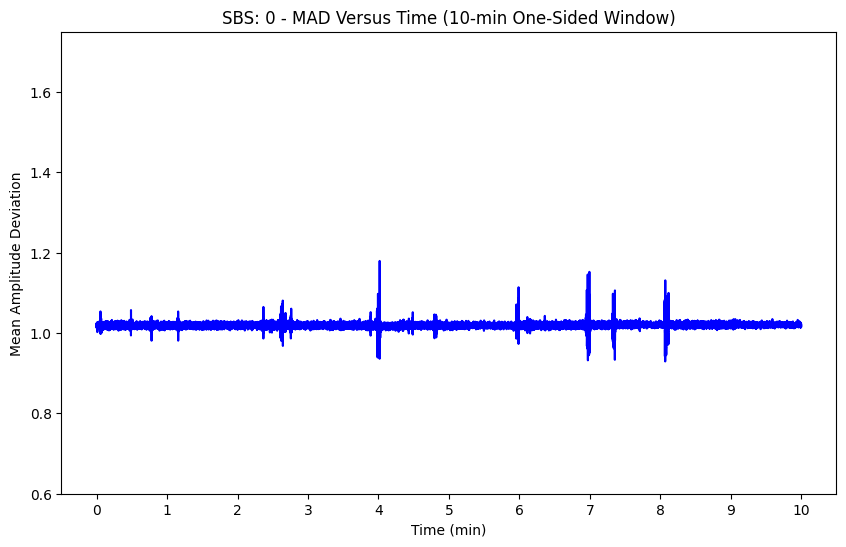

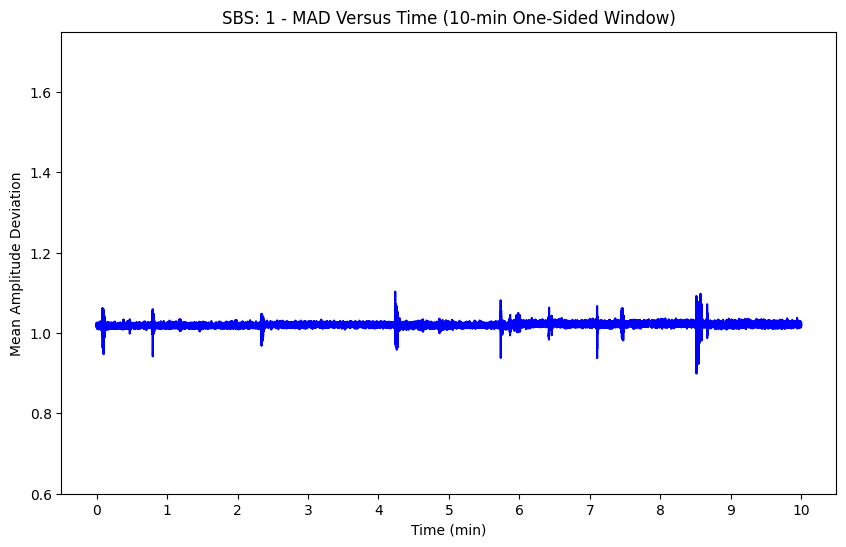

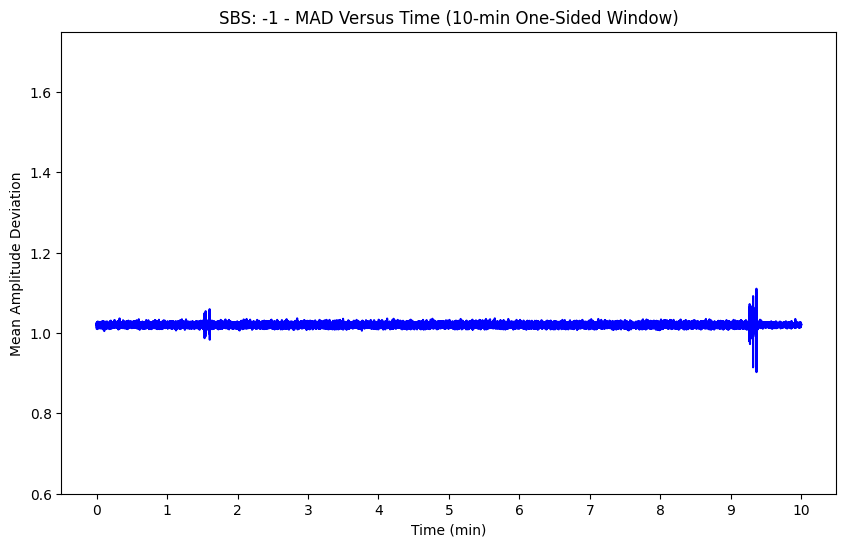

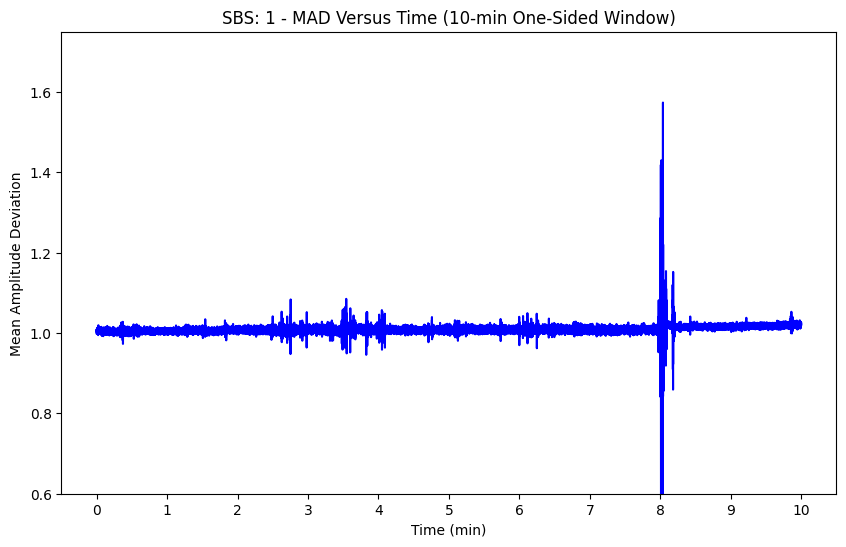

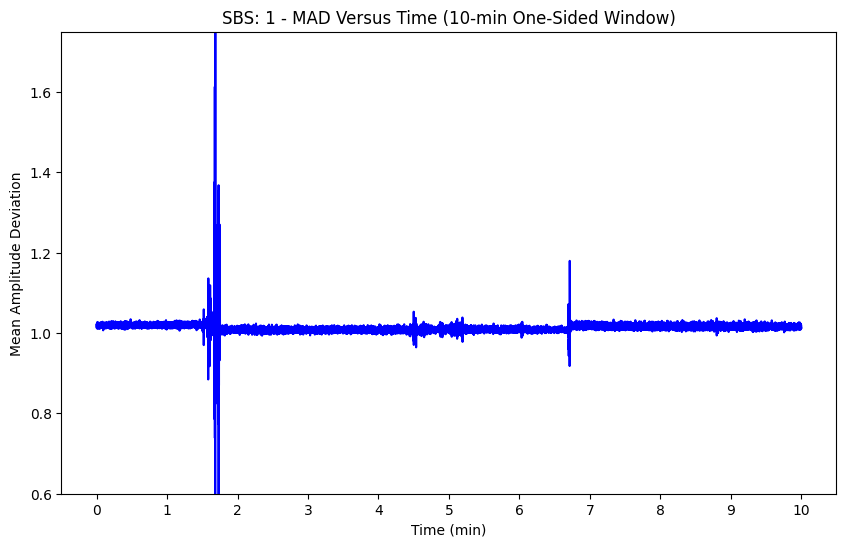

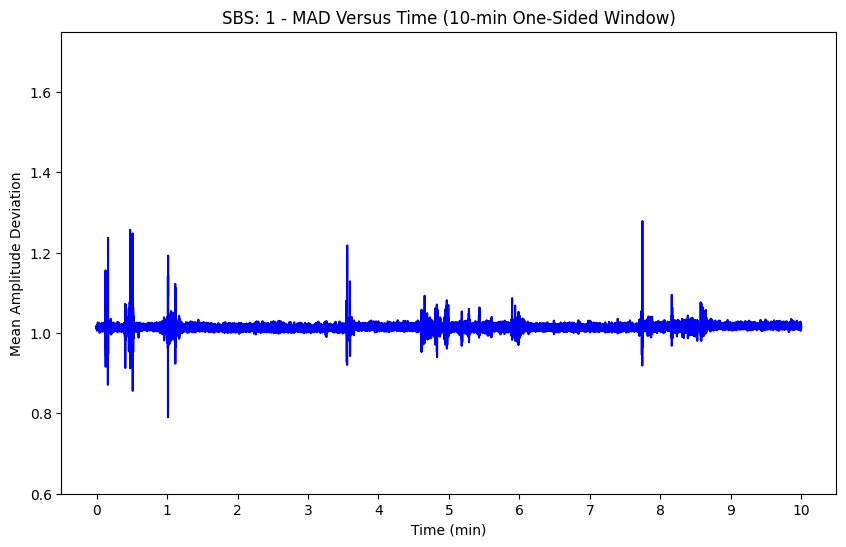

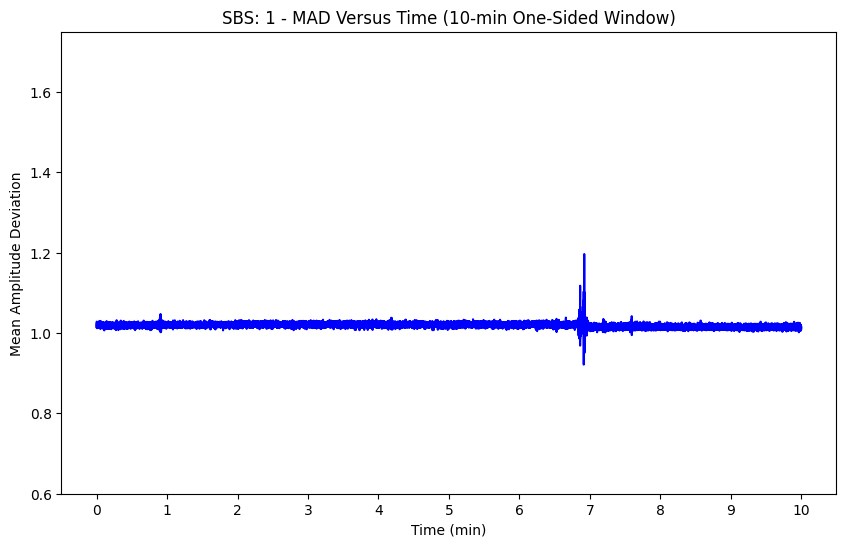

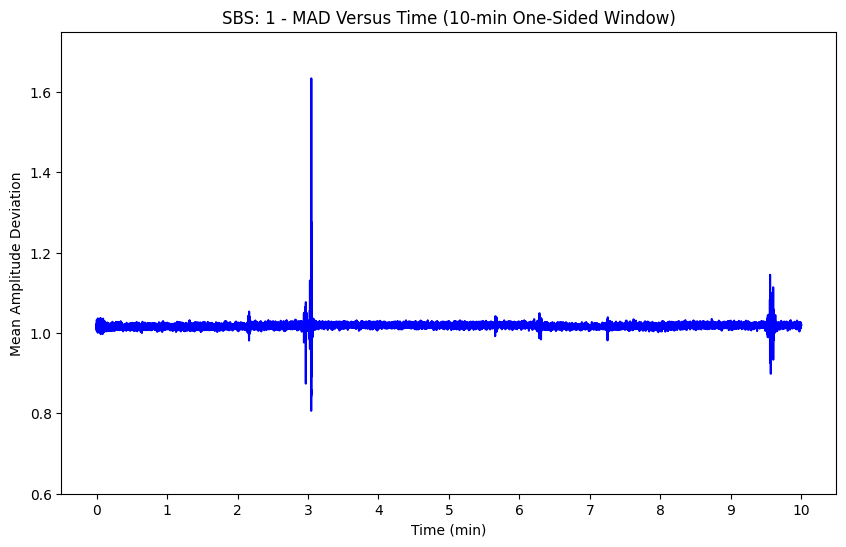

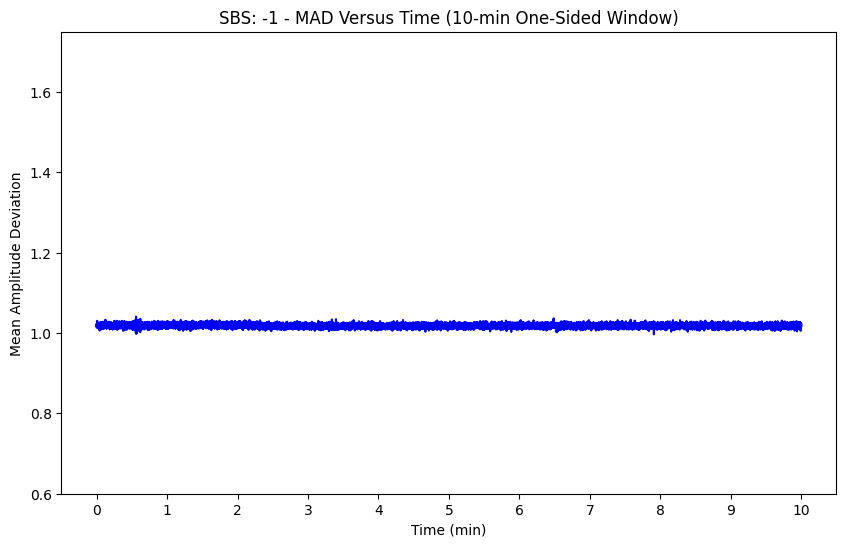

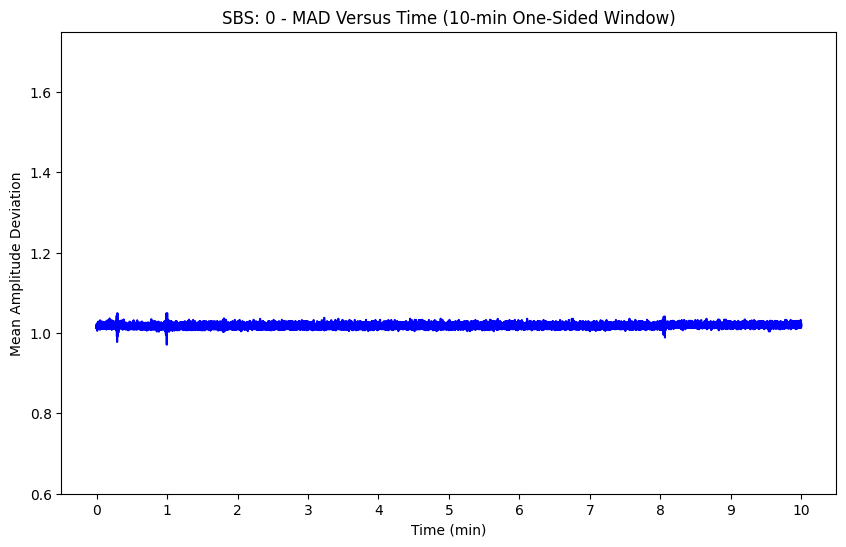

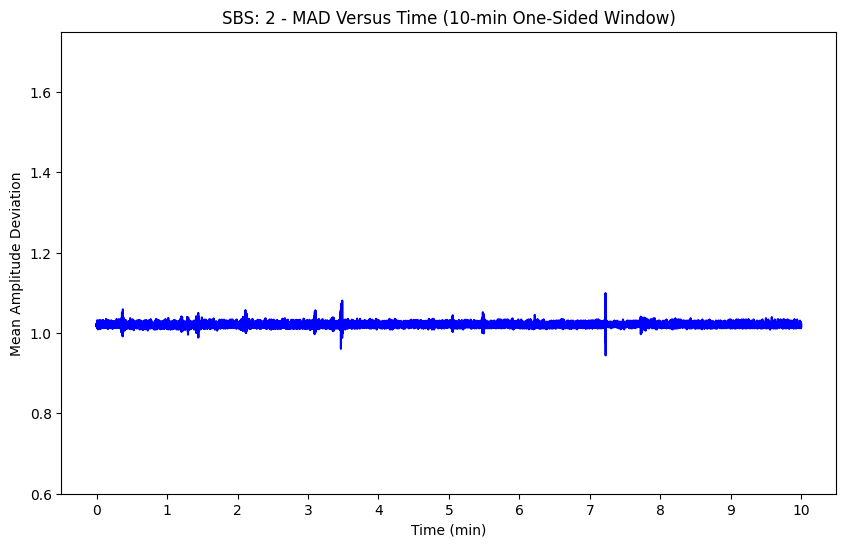

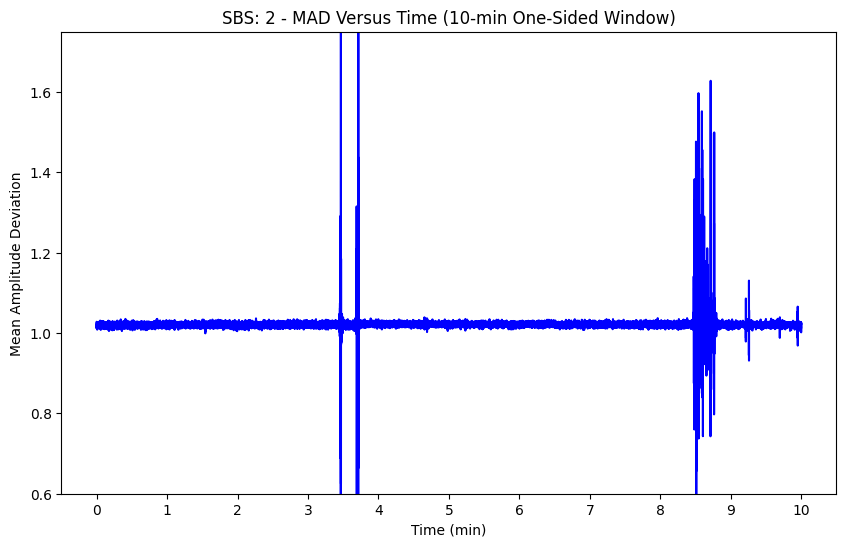

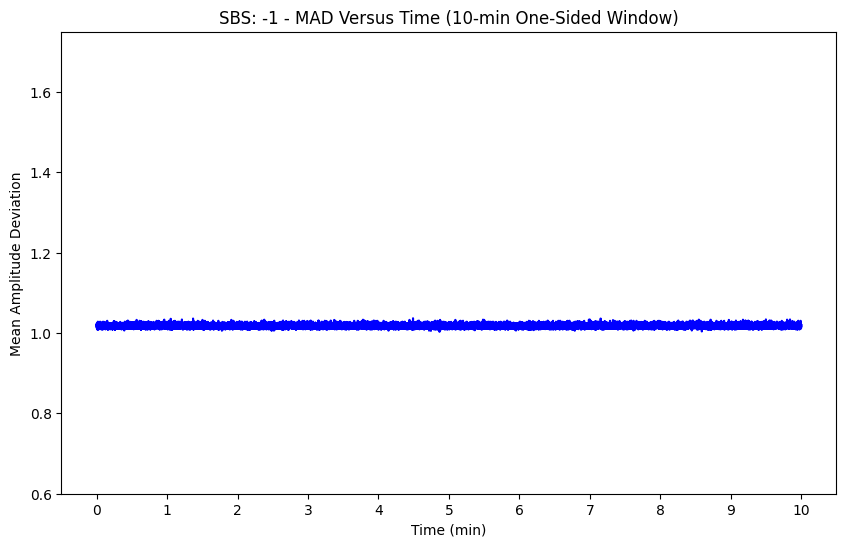

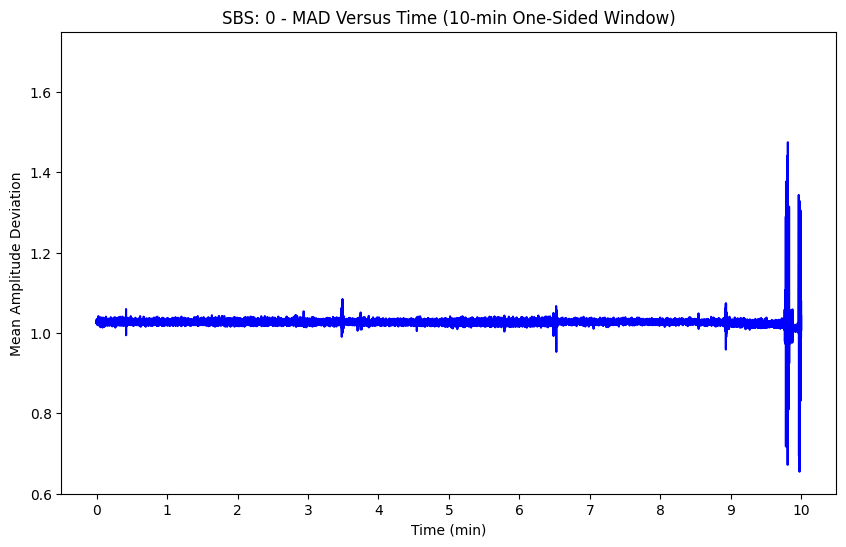

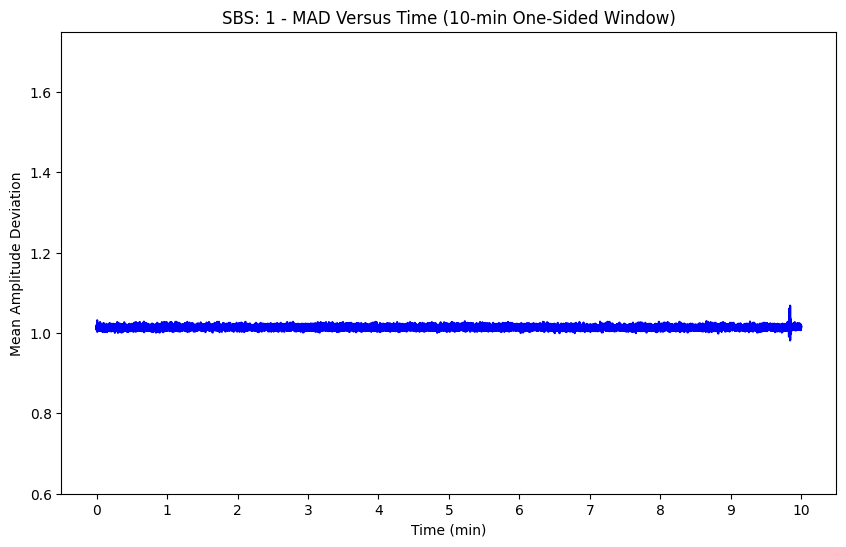

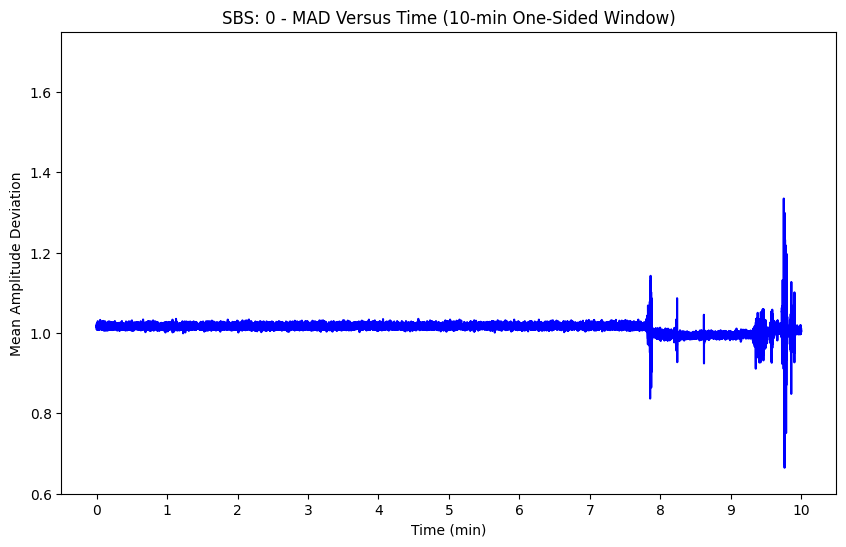

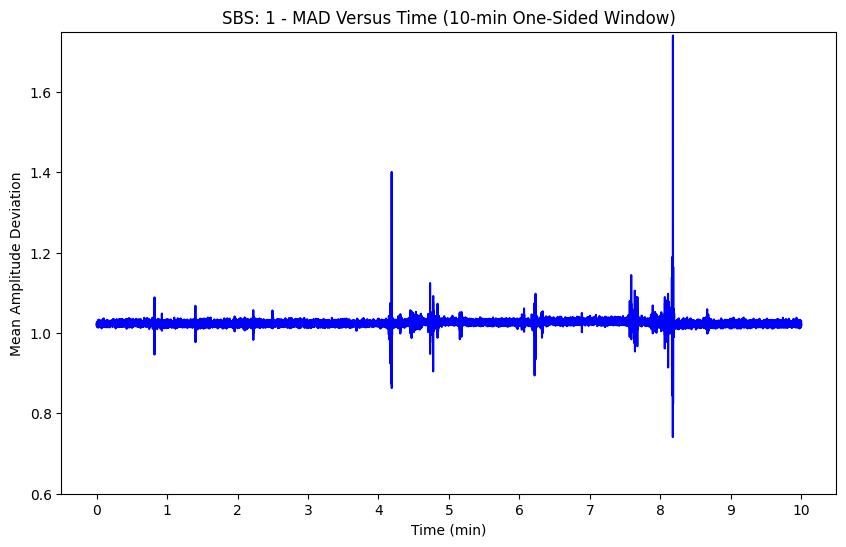

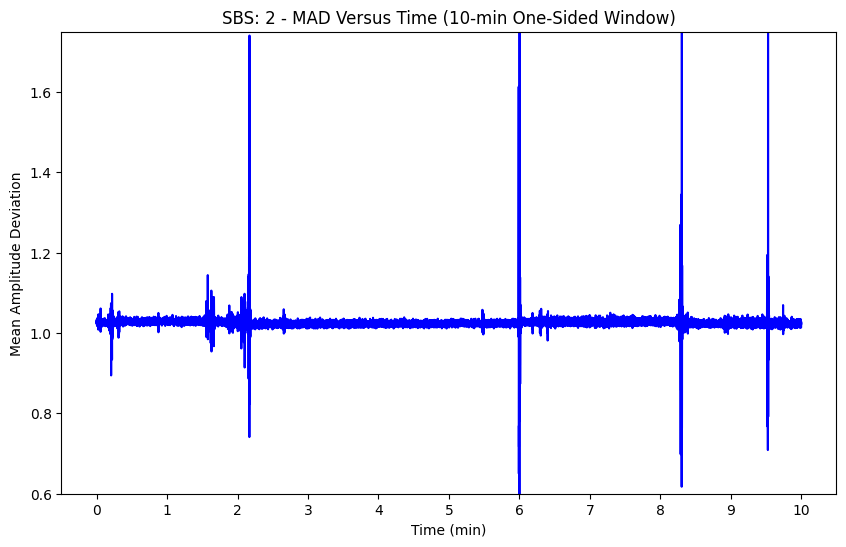

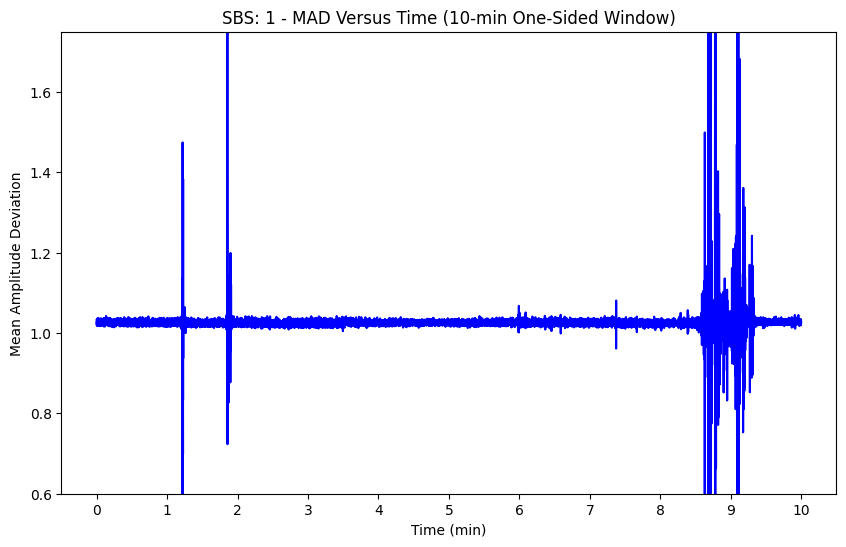

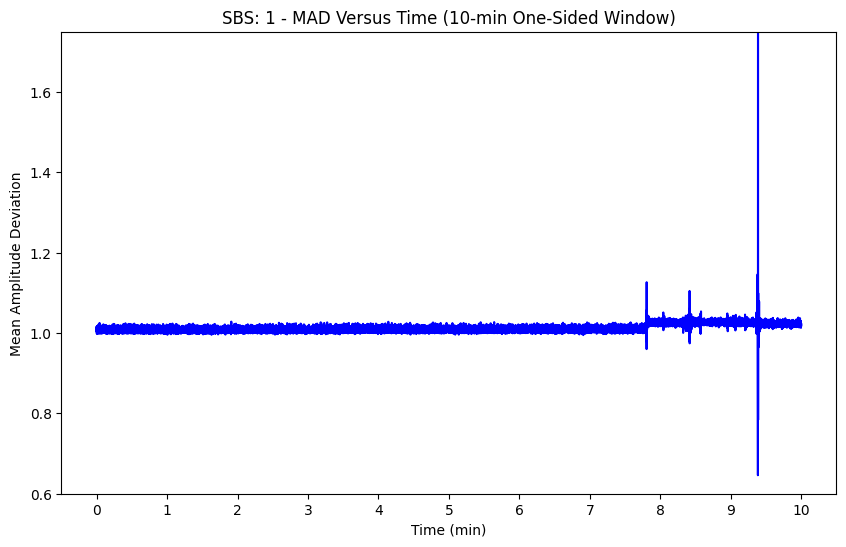

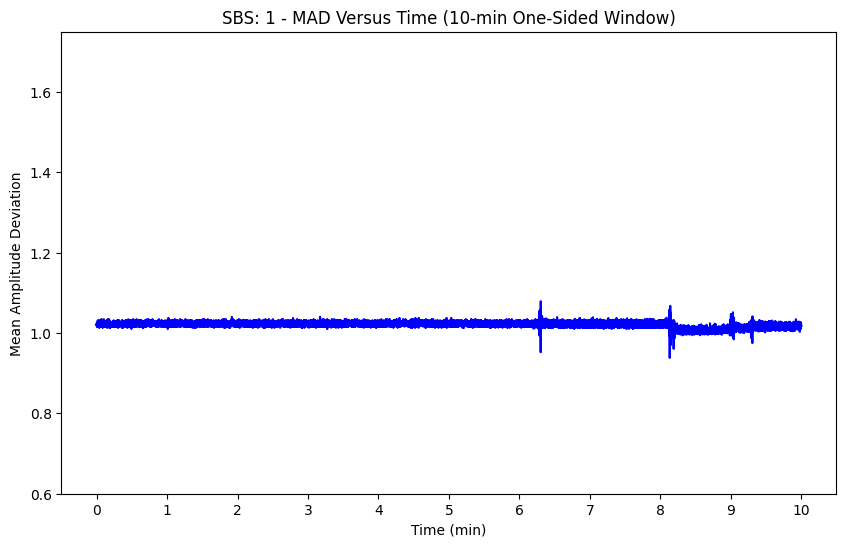

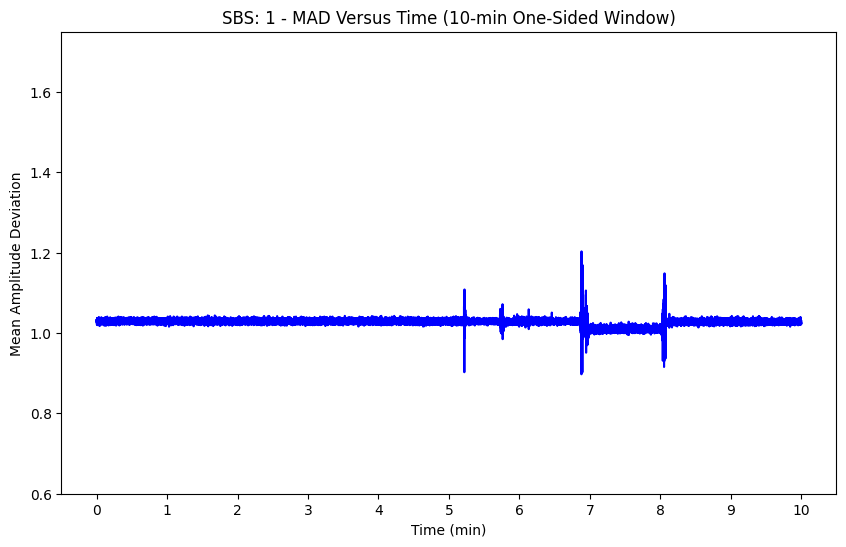

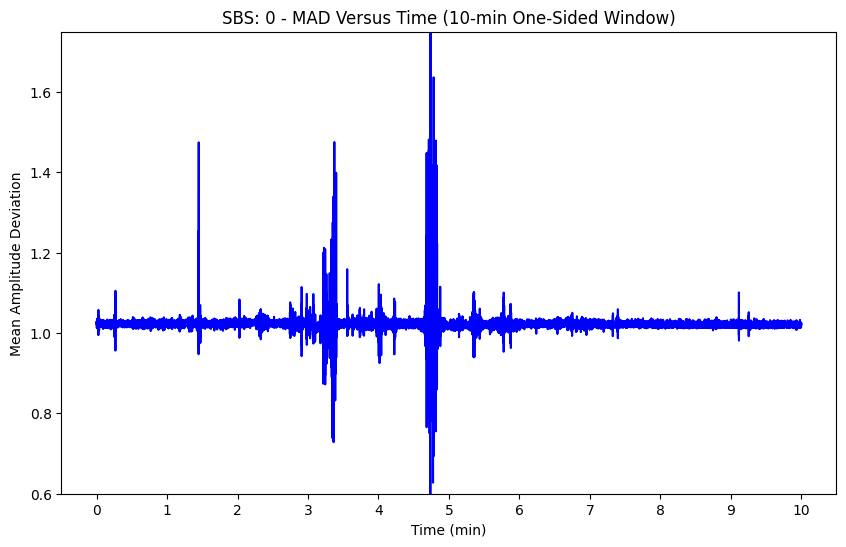

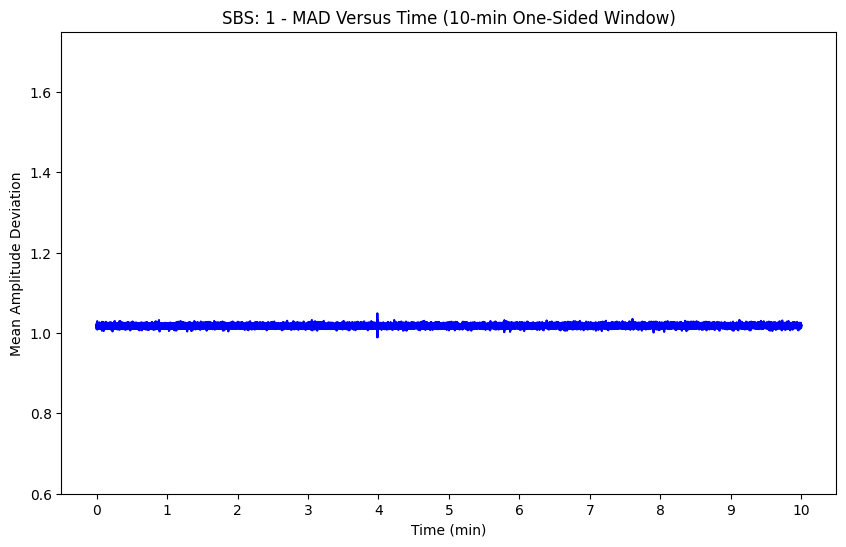

In [47]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 59899, num=59899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 59899, num=11), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (10-min One-Sided Window)')

    # Display the plot
    plt.show()
    
    count += 1